In [1]:
!pip install umap-learn
!pip install datashader 
!pip install bokeh
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=8bd3ad71973bdb3e47b192288639505d6668adc16357eee1268347b0cf37604b
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=f8a844c9d0461f1dd66b7678b3c7ee27fda6d1f7a51ec20196faebfdf51775ac
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [2]:
!pip install velocyto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 61.1 MB/s eta 0:00:00
  Created wheel for velocyto: filename=velocyto-0.17.17-cp38-cp38-linux_x86_64.whl size=389951 sha256=c315a9fafd29bb7875f6f135803211b94fffb8c1f4081e53d31dc8eb7d19b43e
  Stored in directory: /root/.cache/pip/wheels/cd/04/13/c47273eed9825d383b6501e7460ef3400922deb21fea639b6a
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52040 sha256=e6b9aa2c6be317c758cc41a41fa495ea1258440836634e422dae0727a4f42c61
  Stored in directory: /root/.cache/pip/wheels/51/a8/38/34cd3ac301d305904452deca6780940beb70d059798042fd63
Successfully built velocyto loompy


In [3]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import loompy
import velocyto as vcy
import logging
import seaborn as sns
from sklearn.manifold import TSNE
import umap.plot
import umap
import pandas as pd
from sklearn.neighbors import KernelDensity
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42

In [4]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [5]:
def ixs_thatsort_a2b(a: np.ndarray, b: np.ndarray, check_content: bool=True) -> np.ndarray:
    "This is super duper magic sauce to make the order of one list to be like another"
    if check_content:
        assert len(np.intersect1d(a, b)) == len(a), f"The two arrays are not matching"
    return np.argsort(a)[np.argsort(np.argsort(b))]

def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

In [6]:
dp = dict(min_expr_counts=30,
          min_cells_express=20,
          N=1500,
          min_expr_counts_U=20,
          min_cells_express_U=15,
          min_avg_U=0.008,
          min_avg_S=0.08,
          n_comps = 20,
          limit_gamma=False,
          fit_offset=False,
          n_neighbors = 40,
          k = 70)

In [7]:
!mkdir data

In [8]:
from urllib.request import urlretrieve
urlretrieve("http://pklab.med.harvard.edu/velocyto/Haber_et_al/Haber_et_al.loom",
            "data/Haber_et_al.loom")
urlretrieve("http://pklab.med.harvard.edu/velocyto/Haber_et_al/goatools_cellcycle_genes.txt",
            "data/goatools_cellcycle_genes.txt")

('data/goatools_cellcycle_genes.txt',
 <http.client.HTTPMessage at 0x7f65b2c36c10>)

In [9]:
cell_cycle_genes = open("data/goatools_cellcycle_genes.txt").read().split()

In [10]:
# Crate an analysis object
vlm = vcy.VelocytoLoom("data/Haber_et_al.loom")  # CHANGE THIS PATH TO YOUR LOCAL PATH

In [11]:
vlm.filter_cells(~np.in1d(vlm.ca["Bamfile"], ["Atlas1", "Atlas2", "Atlas6", "Atlas5"]))

Text(0, 0.5, 'unspliced')

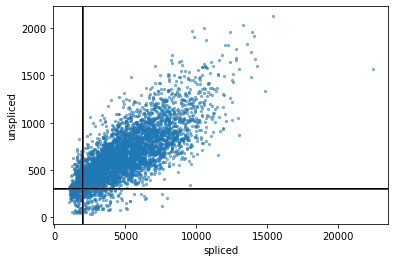

In [12]:
plt.scatter(vlm.initial_cell_size, vlm.initial_Ucell_size, alpha=0.5, s=5)
plt.axvline(2000, c="r", lw=1)
plt.axvline(np.percentile(vlm.initial_cell_size, 8), c="k", lw=1)
plt.axhline(300, c="r", lw=1)
plt.axhline(np.percentile(vlm.initial_Ucell_size, 8), c="k", lw=1)
plt.xlabel("spliced"); plt.ylabel("unspliced")

In [13]:
vlm.filter_cells(bool_array=(vlm.initial_Ucell_size > 300) & (vlm.initial_cell_size > 2000))

In [14]:
# Read column attributes form the loom file and specify colors
colors_dict = {'Endocrine':np.array([137, 34, 81]),
 'Enterocyte.Immature.Distal':np.array([130, 162, 209]),
 'Enterocyte.Immature.Proximal':np.array([224, 139, 183]),
 'Enterocyte.Mature.Distal':np.array([52, 127, 184]),
 'Enterocyte.Mature.Proximal':np.array([150, 81, 156]),
 'Enterocyte.Progenitor':np.array([224, 139, 104]),
 'Enterocyte.Progenitor.Early':np.array([96, 97, 96]),
 'Enterocyte.Progenitor.Late':np.array([107, 194, 165]),
 'Goblet':np.array([225,34,46]),
 'Paneth':np.array([190,190,190]),
 'Stem':np.array([37,139,72]),
 'TA.Early':np.array([249,214,64]),
 'TA.G1':np.array([164,87,44]),
 'TA.G2':np.array([164,209,235]),
 'Tuft':np.array([223,127,49]),
 'TA':np.array([164,87,44]),}
colors_dict = {k:v/256 for k, v in colors_dict.items()}
vlm.ca["Celltype"][np.in1d(vlm.ca["Celltype"], ["TA.G1", "TA.G2"])] = "TA"
vlm.set_clusters(vlm.ca["Celltype"], cluster_colors_dict=colors_dict)

In [15]:
L = list(colors_dict.items())[::-1]

(0.8, 2.0, -1.0, 8.0)

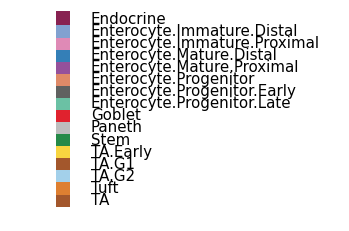

In [16]:
for zz, (k, v) in enumerate(L):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis("off")

In [17]:
cellamount_dict = {'Enterocyte.Immature.Distal': 244,
 'Enterocyte.Immature.Proximal': 144,
 'Enterocyte.Mature.Distal': 148,
 'Enterocyte.Mature.Proximal': 364,
 'Enterocyte.Progenitor': 117,
 'Enterocyte.Progenitor.Early': 489,
 'Enterocyte.Progenitor.Late': 179,
 'Goblet': 269,
 'Paneth': 78,
 'Stem': 666,
 'TA': 458,
 'TA.Early': 270,
 'Tuft': 76,
 'Endocrine': 137}

In [18]:
dict(zip(*np.unique(vlm.ca["Celltype"], return_counts=1))) ==cellamount_dict

True

In [19]:
from scipy.stats.mstats import gmean, hmean

In [20]:
tosample = int(np.ceil(np.mean(np.unique(vlm.ca["Celltype"], return_counts=1)[1])))
np.random.seed(19900715)
downsaple_ixs = []
for ct in np.unique(vlm.ca["Celltype"]):
    ixs = np.where(vlm.ca["Celltype"] == ct)[0]
    downsaple_ixs.append(np.random.choice(ixs, min(tosample, len(ixs)), replace=False))
downsaple_ixs = np.concatenate(downsaple_ixs)
len(downsaple_ixs)

2683

In [21]:
vlm.filter_cells(bool_array=np.in1d(np.arange(vlm.S.shape[1]), downsaple_ixs))

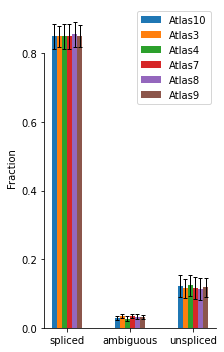

In [22]:
vlm.plot_fractions()

In [23]:
vlm.filter_genes(by_custom_array=~np.in1d(vlm.ra["Gene"], cell_cycle_genes))

In [24]:
vlm.score_detection_levels(min_expr_counts=dp["min_expr_counts"], min_cells_express=dp["min_cells_express"])
vlm.filter_genes(by_detection_levels=True)

In [25]:
# Feature selection - enrichment score
vlm._normalize_S(relative_size=vlm.S.sum(0),
                 target_size=np.median(vlm.S.sum(0)))

M = np.zeros((vlm.S.shape[0], len(np.unique(vlm.cluster_ix))))
F = np.zeros((vlm.S.shape[0], len(np.unique(vlm.cluster_ix))))
for i in np.unique(vlm.cluster_ix):
    D = vlm.S_sz[:, vlm.cluster_ix ==i]
    M[:, i] = D.mean(1)
    F[:, i] = (D>0).mean(1)
Enrich = (M / vlm.S_sz.mean(1)[:,None]) * (F / (vlm.S_sz > 0).mean(1)[:,None])

In [26]:
n = 110
selected = []
for i in np.unique(vlm.cluster_ix):
    selected.append(np.argsort(Enrich[:,i])[::-1][:n])
selected = np.unique(np.concatenate(selected))
selected.shape

(1296,)

In [27]:
vlm.filter_genes(by_custom_array=np.in1d(np.arange(vlm.S.shape[0]), selected))

In [28]:
vlm.score_detection_levels(min_expr_counts=0, min_cells_express=0,
                           min_expr_counts_U=dp["min_expr_counts_U"], min_cells_express_U=dp["min_cells_express_U"])
vlm.score_cluster_expression(min_avg_U=dp["min_avg_U"], min_avg_S=dp["min_avg_S"])
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

In [29]:
combined_size = (vlm.S.sum(0) / np.percentile(vlm.S.sum(0), 95)) + (vlm.initial_cell_size / np.percentile(vlm.initial_cell_size, 95))
combined_Usize = (vlm.U.sum(0) / np.percentile(vlm.U.sum(0), 95)) + (vlm.initial_Ucell_size / np.percentile(vlm.initial_Ucell_size, 95))
vlm._normalize_S(relative_size=0.25*combined_size*np.median(vlm.S.sum(0)),
                 target_size=np.median(vlm.S.sum(0)))
vlm._normalize_U(relative_size=0.5*combined_Usize*np.median(vlm.U.sum(0)),
                 target_size=np.median(vlm.U.sum(0)))

18

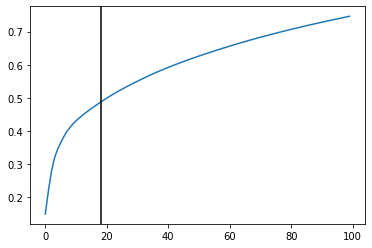

In [30]:
vlm.perform_PCA()
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.006))[0][0]
plt.axvline(n_comps, c="k"); n_comps

Text(0, 0.5, 'PC5')

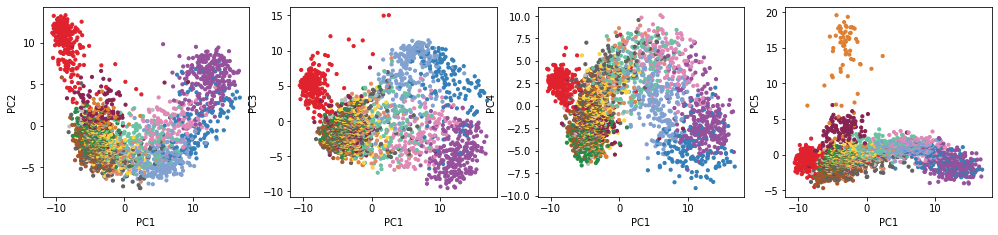

In [31]:
plt.figure(None, (17,3.5))
plt.subplot(141)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,1], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.subplot(142)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,2], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC3")
plt.subplot(143)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,3], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC4")
plt.subplot(144)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,4], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC5")

In [32]:
k = dp["k"] = 70
vlm.knn_imputation(n_pca_dims=9, k=k, balanced=True, b_sight=k*6, b_maxl=int(k*3.5), n_jobs=16)
vlm.fit_gammas(limit_gamma=False, fit_offset=True)

In [33]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_unspliced", delta_t=4)
vlm.extrapolate_cell_at_t(delta_t=1.)

In [34]:
mapper = umap.UMAP().fit(vlm.pcs[:,:9])

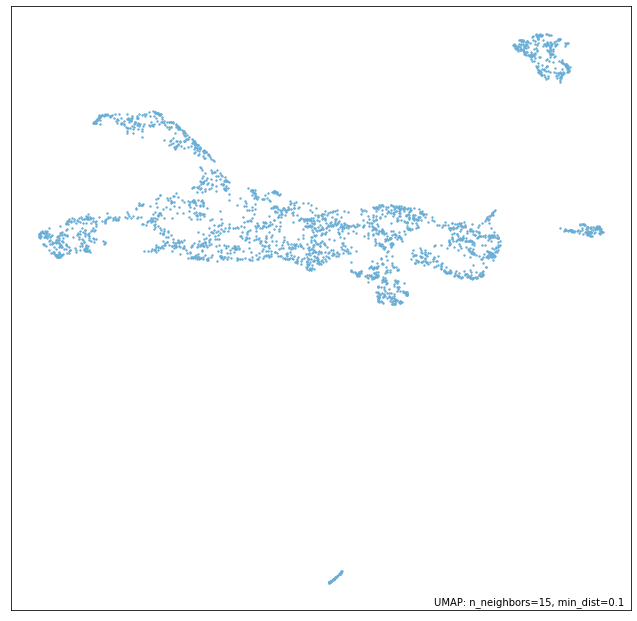

In [35]:
umap.plot.points(mapper)

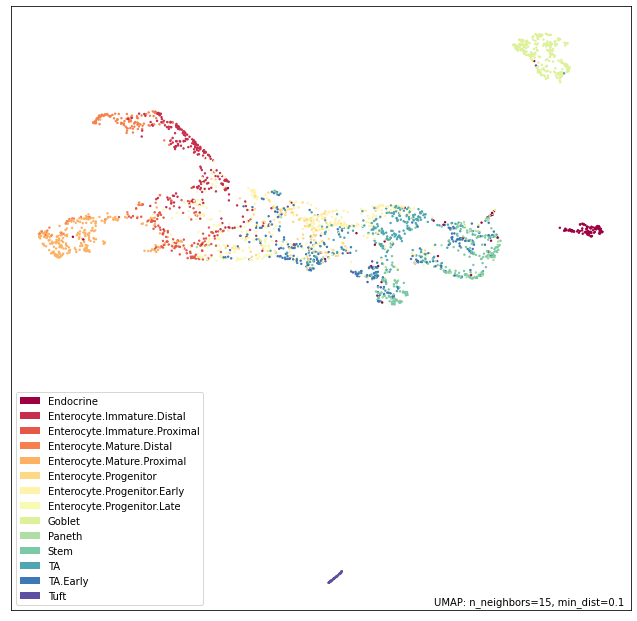

In [36]:
umap.plot.points(mapper, labels=vlm.ca["Celltype"])

In [37]:
reducer = umap.UMAP()

In [38]:
embedding = reducer.fit_transform(vlm.pcs[:,:9])
embedding.shape

(2683, 2)

In [39]:
from sklearn import preprocessing

In [40]:
label_encoder = preprocessing.LabelEncoder()

In [41]:
labels = label_encoder.fit_transform(vlm.ca["Celltype"])

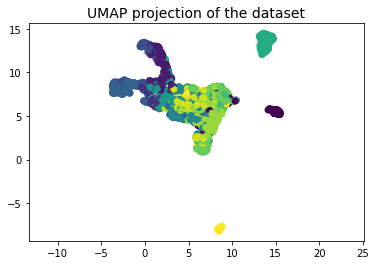

In [42]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=14);

In [43]:
vlm.ts = embedding

In [44]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=30, knn_random=True, sampled_fraction=0.95,
                             calculate_randomized=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
vlm.calculate_embedding_shift(sigma_corr = 0.05)

In [46]:
vlm.calculate_grid_arrows(smooth=0.85, steps=(32, 32), n_neighbors=50)

(0.8, 2.0, -1.0, 8.0)

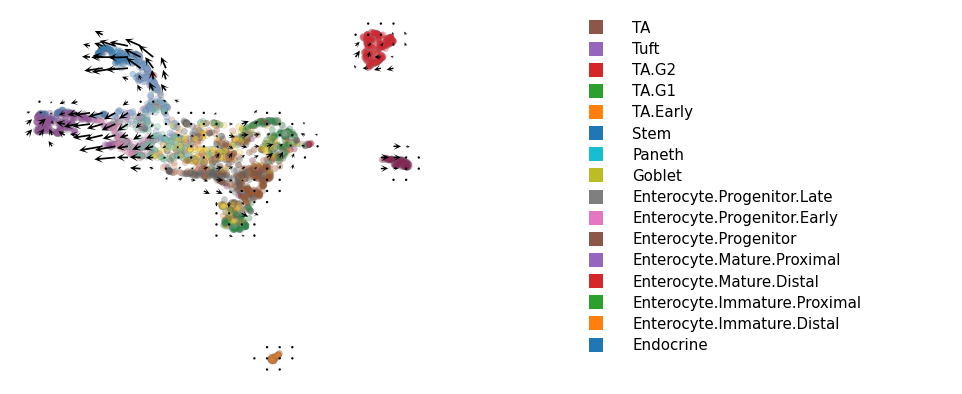

In [47]:
plt.figure(None,(17,7))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=1.4,
                     scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True},
                     min_mass=5.5, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                     plot_random=False, scale_type="relative")
plt.subplot(122)
for zz, (k, v) in enumerate(L[::-1]):
    plt.scatter(1, zz/2., marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis("off")

In [48]:
ds = loompy.connect("/content/data/Haber_et_al.loom")

S = np.array(ds["spliced"][:])
cellids = np.array(ds.ca.CellID)
genenames = np.array(ds.ra.Gene)

In [49]:
ds.close()

In [50]:
mask = np.in1d(cellids, vlm.ca["CellID"])
cellids = cellids[mask]
S = S[:, mask]

mask = (S.sum(1) > 20) & ((S>0).sum(1) > 15)
genenames = genenames[mask]
S = S[mask, :]

np.alltrue(cellids == vlm.ca["CellID"])

# Size normalize
S_sz = S / S.sum(0)
# Impute
Sx_sz = vcy.convolve_by_sparse_weights(S_sz, vlm.knn_smoothing_w)

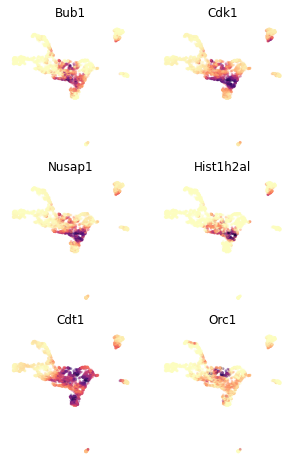

In [51]:
plt.figure(None, (5,8))
gs = plt.GridSpec(3,2)
gene_list = ['Bub1', 'Cdk1', 
             'Nusap1', 'Hist1h2al',
              "Cdt1", "Orc1",]
for i, gene in enumerate(gene_list):
    plt.subplot(gs[i])
    colorandum = Sx_sz[np.where(genenames == gene)[0][0], :]
    vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:, 1], c=colorandum, cmap="magma_r", alpha=0.35, s=3, rasterized=True)
    plt.title(gene)
    plt.axis("off")

In [52]:
k = dp["k"] = 150
vlm.knn_imputation(n_pca_dims=9, k=k, balanced=True, b_sight=k*6, b_maxl=int(k*3.5), n_jobs=16)

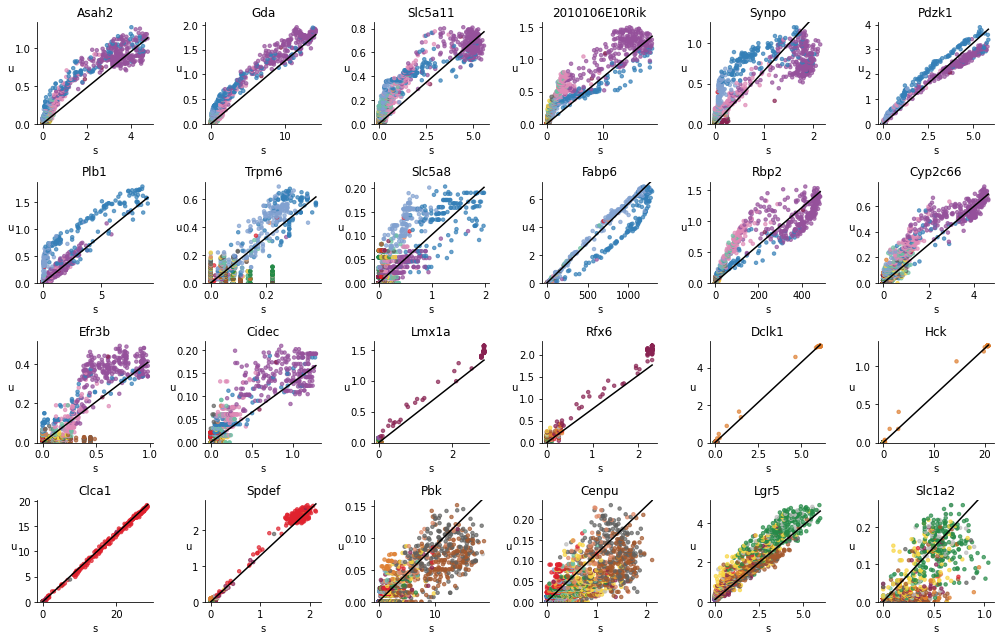

In [53]:
genes = ["Asah2", "Gda", "Slc5a11", '2010106E10Rik',  "Synpo", 'Pdzk1',
         "Plb1", 'Trpm6',  "Slc5a8", 'Fabp6',   'Rbp2', "Cyp2c66", 'Efr3b', 'Cidec', 
         'Lmx1a', "Rfx6",  'Dclk1', 'Hck',  'Clca1',  "Spdef",  
         'Pbk', "Cenpu", "Lgr5", "Slc1a2"]

plt.figure(None, (14,9))
gs = plt.GridSpec(4,6)
for i, gn in enumerate(genes):
    plt.subplot(gs[i])
    try:
        ix=np.where(vlm.ra["Gene"] == gn)[0][0]
    except:
        continue
    vcy.scatter_viz(vlm.Sx_sz[ix,:], vlm.Ux_sz[ix,:], c=vlm.colorandum, s=12, alpha=0.7, rasterized=True)
    plt.title(gn)
    xnew = np.linspace(0,vlm.Sx[ix,:].max())
    plt.plot(xnew, vlm.gammas[ix] * xnew + vlm.q[ix], c="k")
    plt.ylim(0, np.max(vlm.Ux_sz[ix,:])*1.05)
    plt.xlabel("s")
    plt.ylabel("u", rotation=0)
    despline()
plt.tight_layout()